# Edge modes in subwavelength resonators in one dimension
By: H. Ammari, S. Barandun, J. Cao, and F. Feppon

Paper available at: https://arxiv.org/abs/2301.06747


Corresponing author: silvio _dot_ barandun _at_ sam _dot_ math _dot_ ethz _dot_ ch

## Introduction
In this notebook we reproduce the figures of the above-mentioned paper.

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
params = {"text.usetex": True,
          "font.family": "serif",
          "font.serif": ["Computer Modern Serif"]}
plt.rcParams.update(params)
import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['figure.dpi'] = 100

from tqdm import tqdm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
%load_ext autoreload
%autoreload 2

In [2]:
from Acoustic_OneDimensional import *

## Hermitian case

Resonant frequencies $\omega^\alpha$ for an Hermitian case

In [3]:
pwp = PeriodicWaveProblem(N=2,li=1,lij=[2,1],v=1,vb=2,delta=0.001)
_ = pwp.get_all_resonant_frequencies()
pwp.plot_resonant_frequencies(type='single',
                              re=True,
                              im=False,
                              edgemode=False,
                              bw=False,
                              save=True)

### Edge mode in case of geometrical defect

Convergence of the resonant frequencies of the finite case towards the infinite case for an increasing number of resonators

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


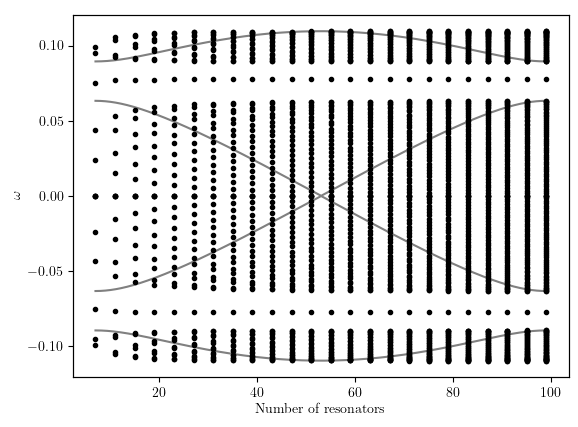

In [4]:
plot_RF_increasing_length(Nmin=6+1,Nmax=100+1,step=4,lij=[1,2],li=1,vb=2)

Plot of the edge mode

In [5]:
N = 39
lij_unit = [1,2]
lij = list(np.flip(lij_unit)) * int(N / 4 + 1) + list(lij_unit) * int(N / 4 + 1)
lij = lij[1:-1]
fwp = FiniteWaveProblem(N=N, li=1, lij=lij, v=1, vb=2, delta=0.001,
                        uin=lambda x:np.zeros_like(x), duin=lambda x:np.zeros_like(x))
omegas, idxs = fwp.find_edgemodefrequency_and_idx()
fwp.set_omega(omega=omegas[0])
fwp.plot_u(im=False, long_range=100, save=True, name_addition='edgemode_N=39_Hermitian')

This is a resonant frequency: log10(abs(det(A))=-161.87945163416163


Stability of the edge frequency with respect to defect in the geometry

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


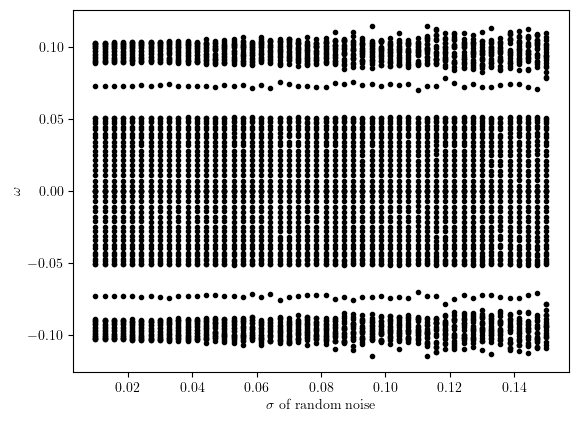

In [6]:
plot_RF_with_geometrical_perturbation(N=10*4-1,sigma_min=0.01,sigma_max=0.15,lij=[1,3],li=1,vb=2, save=True)

## Non-Hermitian case

/scratch/users/silvioba/Documents/PhD/01_Projects/01_1D_NonHermitian_Subwavelength/03_text/03_MMS_submission/0_supplementary_material/Acoustic_OneDimensional.py:458: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


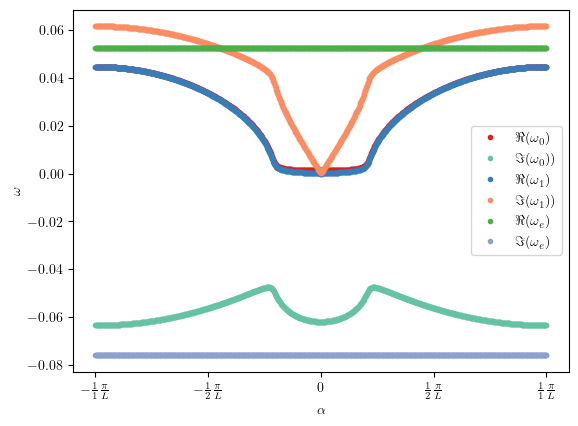

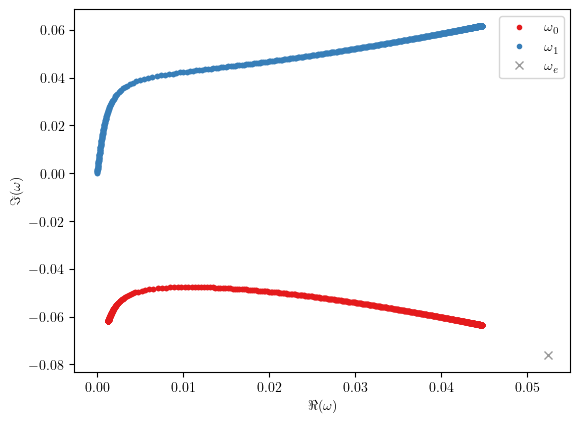

In [7]:
pwp = PeriodicWaveProblem(N=2, li=1, lij=[1,1], v=1,
                              vb=[1+1.38j,1-1.42j], delta=0.001)
_ = pwp.get_all_resonant_frequencies()
pwp.plot_resonant_frequencies(type='single',
                              re=True,
                              im=True,
                              edgemode=True,
                              bw=False,
                              save=True)
pwp.plot_resonant_frequencies(type='complex',
                              re=True,
                              im=True,
                              edgemode=True,
                              bw=False,
                              save=True)

In [8]:
fwp = pwp.get_finite_equivalent(n_repetition=100,
                                omega=pwp.compute_edge_mode_frequency(),
                                defect='parameters')
#fwp.plot_resonant_frequencies(mode='single')
fwp.plot_u(im=True, sampling_points=10,long_range=100, save=True, name_addition='edgemode_nonHermitian')

This is a resonant frequency: abs(det(A)=0


/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


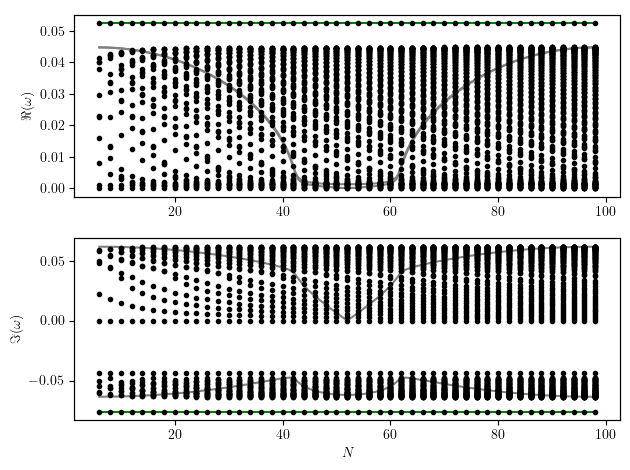

In [9]:
pwp = PeriodicWaveProblem(N=2, li=1, lij=[1,1], v=1,
                              vb=[1+1.38j,1-1.42j], delta=0.001)
res_freqs_pwp_dict = pwp.get_all_resonant_frequencies()
alphas = np.stack(list(res_freqs_pwp_dict.keys()))
res_freq_pwp = np.stack(list(res_freqs_pwp_dict.values()))
# fwp = pwp.get_finite_equivalent(n_repetition=100,
#                                 omega=pwp.compute_edge_mode_frequency(),
#                                 defect='parameters')
freqs = {}
for N in range(6,100,2):
    fwp = pwp.get_finite_equivalent(n_repetition=N,
                                    omega=pwp.compute_edge_mode_frequency(),
                                    defect='parameters')
    res_freq = fwp.getResonatFrequencies(verbose=False)
    freqs[N] = res_freq

fig, axs = plt.subplots(2,1,figsize=constants.figsz)
for key, val in freqs.items():
    _ = axs[0].plot(np.ones_like(val) * key, np.real(val), '.', c='black');
    _ = axs[1].plot(np.ones_like(val) * key, np.imag(val), '.', c='black');
axsr = axs[0].twiny()
_ = axsr.set_xticks([])
_ = axsr.plot(alphas, np.real(res_freq_pwp), color='grey');
_ = axsr.plot(alphas, np.ones_like(alphas)*np.real(pwp.compute_edge_mode_frequency()), color='green');
axs[0].set_zorder(1)  # default zorder is 0 for ax1 and ax2
axs[0].patch.set_visible(False)  # prevents ax1 from hiding ax2

_ = axsi = axs[1].twiny()
_ = axsi.set_xticks([])
_ = axsi.plot(alphas, np.imag(res_freq_pwp), color='grey')
_ = axsi.plot(alphas, np.ones_like(alphas)*np.imag(pwp.compute_edge_mode_frequency()), color='green')
axs[1].set_zorder(1)  # default zorder is 0 for ax1 and ax2
axs[1].patch.set_visible(False)  # prevents ax1 from hiding ax2

#axs[0].set_xlabel('Number of repretitions')
_ = axs[0].set_ylabel('$\\Re(\\omega)$')
_ = axs[1].set_xlabel('$N$')
_ = axs[1].set_ylabel('$\\Im(\\omega)$')
#_ = axs[0].set_title('Resonant Modes')
#fig.savefig(f'{constants.path_output_figures}convergence_nonHermitianEdgemode.pdf',bbox_inches='tight')# if save else None
plt.tight_layout()
fig.savefig(f'{constants.path_output_figures}convergence_nonHermitianEdgemode.pdf',bbox_inches='tight')

/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


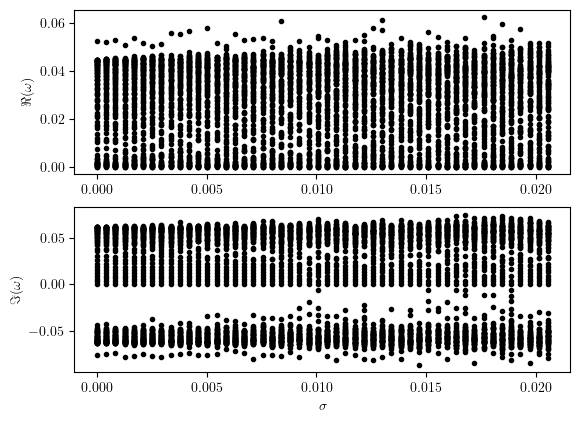

In [10]:
plot_RF_with_parameter_perturbation(N=100, sigma_min=0, sigma_max=0.05,
                                    lij=1, li=1,vb = np.array([1+1.38j,1-1.42j]), save=True)

[-19.35813268  23.01264835]


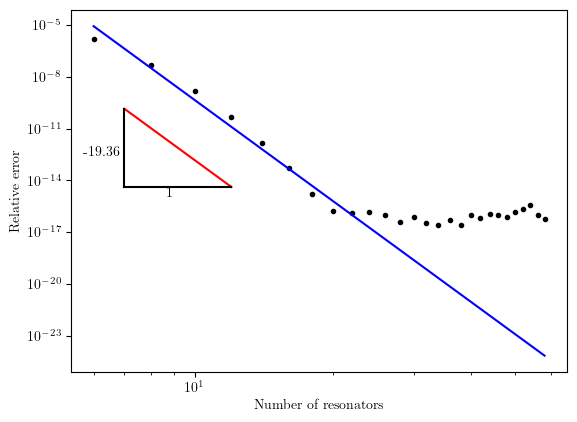

In [11]:
save = True
pwp = PeriodicWaveProblem(N=2, li=1, lij=[1,1], v=1,
                              vb=[1+1.38j,1-1.42j], delta=0.001)
freqs = []
Ns = range(6,60,2)
for N in Ns:
    fwp = pwp.get_finite_equivalent(n_repetition=N,
                                    omega=pwp.compute_edge_mode_frequency(),
                                    defect='parameters')
    res_freq = fwp.getResonatFrequencies(verbose=False)
    freqs.append(find_isolated(res_freq)[1])
    
freqs = np.array(freqs)
error = np.abs(freqs - pwp.compute_edge_mode_frequency())

log_N = np.nan_to_num(np.log(Ns),posinf=0,neginf=0)
log_error = np.nan_to_num(np.log(error),posinf=0,neginf=0)
interpol_coef = np.polyfit(x=log_N[:9],y=log_error[:9],deg=1)
print(interpol_coef)
intepolation = np.poly1d(interpol_coef)
inteplated_data = np.exp(intepolation(log_N))
factor = 1
fig,ax = plt.subplots(figsize=constants.figsz)
_ = ax.plot(Ns,error,'.',color='black')
_ = ax.plot(Ns,inteplated_data,'-',color='blue')
interpol_coef[1] = 15 # Shift triangle with slope
triang_x = np.array([7, 12])
triang_y = np.exp(intepolation(np.log(triang_x)))
_ = plt.plot(triang_x,triang_y,color='red')
_ = plt.plot(triang_x,np.ones_like(triang_x)*np.min(triang_y),color='black')
_ = plt.plot(np.ones_like(triang_x)*triang_x[0],triang_y,color='black')
_ = plt.text(np.exp(np.mean(np.log(triang_x)))-0.5,np.min(triang_y)-3e-15,'1')
_ = plt.text(triang_x[0]-1.3,np.exp(np.mean(np.log(triang_y)))-5e-13,f'{interpol_coef[0]:.2f}')
ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_xlabel('Number of resonators')
_ = ax.set_ylabel('Relative error')
fig.savefig(f"{constants.path_output_figures}convergence_relative_error_nonHermitian.pdf", bbox_inches='tight') if save else None

### Zak phase

In [12]:
pwp = PeriodicWaveProblem(N=2, li=1, lij=[3,2], v=1,vb=[1-1j,1+1.1j], delta=0.001)

In [13]:
pwp.perturbation_factor_zakphase()

(0.9276394730232019+6.315170963697313j)